## **A program called** *assignment_5_risk.ipynb*.

Author: Tomasz Uszynski

***

#### **Idea of the program.**

The program simulates 1000 individual battle rounds in Risk (3 attackers vs. 2 defenders) and plots the result.

One battle round is one shake of the attacker and defender dice.

#### **Rules of Risk**

In Risk, one army fights another (using 6-sided dice).

In each battle round, the attacker can put forward up to three of their troops (3 dice).

The defender can use up to two of their defending troops (2 dice).

Each side loses troops depending on the following rules:

1. The two top dice are compared (i.e. the attacker's top dice roll with the defender's top dice roll) 
    They lose one troop if the attacker's dice is the same or lower. Otherwise, the defender loses a troop   (i.e. if the attacker's dice is higher)
2. The next two highest dice from each side are then compared (i.e. the attacker's second highest to the defender's second highest)
If the attacker's dice is the same or lower, they lose one troop; otherwise, the defender loses a troop  (i.e. if the attacker's dice are higher)

***


### **Realisation of the program idea.**

#### Importing neccesary libraries.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

#### Creating a function rollDice to simulate dice roll.

In [2]:
def rollDice(numDice):
    ''' The function takes in a number of dice to roll as an argument and returns the results of the dice rolls sorted in descending order. 
        The function uses the numpy library to generate random numbers between 1 and 6, which represent the faces of a die. 
        The function then sorts the results in descending order and returns the sorted array.
    '''
    return np.sort(np.random.choice(np.arange(1, 7), size=numDice))[::-1]

Referral to a source of information:

[How to Use np.arange()](https://realpython.com/how-to-use-numpy-arange/#:~:text=NumPy%20arange()%3A-,How%20to%20Use%20np.arange(),-by%20Mirko%20Stojiljkovi%C4%87) on Real Python website explains in details how to using NumPy arrage(). 

[numpy.random.choice() in Python](https://www.geeksforgeeks.org/numpy-random-choice-in-python/#:~:text=ML%20project-,numpy.random.choice()%20in%20Python,-Last%20Updated%20%3A) brings details about using choice() method.


[Programiz website](Thttps://www.programiz.com/python-programming/function) provides a good explanation of how to create your own functions.

#### Creating function simulateBattleRounds taking argument numSimulations (number of simulations).

This function, `simulateBattleRounds`, simulates a series of battle rounds between an attacker and a defender, using dice rolls to determine the outcome. For each simulation (specified by `numSimulations`), the attacker rolls 3 dice, and the defender rolls 2 dice. The function then compares the highest dice rolls for both sides and assigns losses accordingly: if the attacker's dice roll is higher, the defender takes a loss, and if the defender's dice roll is higher or equal, the attacker loses. The total losses for both the attacker and the defender are accumulated across all simulations and returned at the end.

It includes a commented-out section for debugging, which prints the dice rolls for both the attacker and defender.

In [3]:
def simulateBattleRounds(numSimulations):
    attackerTotalLosses = 0
    defenderTotalLosses = 0

    for _ in range(numSimulations):
        # Simulate 3 dice rolls for the attacker and 2 for the defender
        attackerDice = rollDice(3)
        defenderDice = rollDice(2)
        
        '''
        This code checks if the dice rolls are correct. I create it to make sure that the battles are simulated correctly.
               
        # Format dice results without brackets
        attackerDiceString = ' '.join(map(str, attackerDice))
        defenderDiceString = ' '.join(map(str, defenderDice))

        print(f'Attacker dice: {attackerDiceString}')
        print(f'Defender dice: {defenderDiceString}')
        '''
        
        # Initialise losses
        attackerLosses = 0
        defenderLosses = 0

        # Compare the highest dice
        for i in range(2):
            if attackerDice[i] > defenderDice[i]:
                defenderLosses += 1
            else:
                attackerLosses += 1

        attackerTotalLosses += attackerLosses
        defenderTotalLosses += defenderLosses

    return attackerTotalLosses, defenderTotalLosses

Referral to a source of information:

[Javatpointg website](https://www.javatpoint.com/python-join-list#:~:text=Therefore%2C%20we%20use%20a%20map,map(str%2C%20list_name)) provides a valuable tutorial about a Python Join List.

[GeeksforGeeks website](https://www.geeksforgeeks.org/python-for-loops/) helps to understand loop `for`.

[Python.org website](https://discuss.python.org/t/for-loop-with-undersore/40538/6#:~:text=The%20loop%20variable%20is%20an%20underscore) provides interesting information about For loop with underscore with precise details on using it.

#### Simulation of 1000 battles.

In [4]:
numSimulations = 1000

# Call the function to simulate the battle rounds.
attackerTotalLosses, defenderTotalLosses = simulateBattleRounds(numSimulations)


#### Printing out the result of battles.

In [5]:
# Conditional check for singular/plural 'simulation'
simulationWord = "simulation" if numSimulations == 1 else "simulations"

# Print the result with dynamic singular/plural handling
print(f"For {numSimulations} {simulationWord}:\n"
      f"Total Attacker Losses: {attackerTotalLosses}\n"
      f"Total Defender Losses: {defenderTotalLosses}")


For 1000 simulations:
Total Attacker Losses: 860
Total Defender Losses: 1140


#### Plotting the result of simulation.

Referral to a source of information:

[Matplotlib website](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) gives all important information about making the bar plot.

[Program Creek website](https://www.programcreek.com/python/example/102315/matplotlib.pyplot.ylim) provides examples of different using of Python matplotlib.pyplot.ylim().

[GeeksforGeeks website](https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/) brings informations about annotate bars in barplot with Matplotlib.

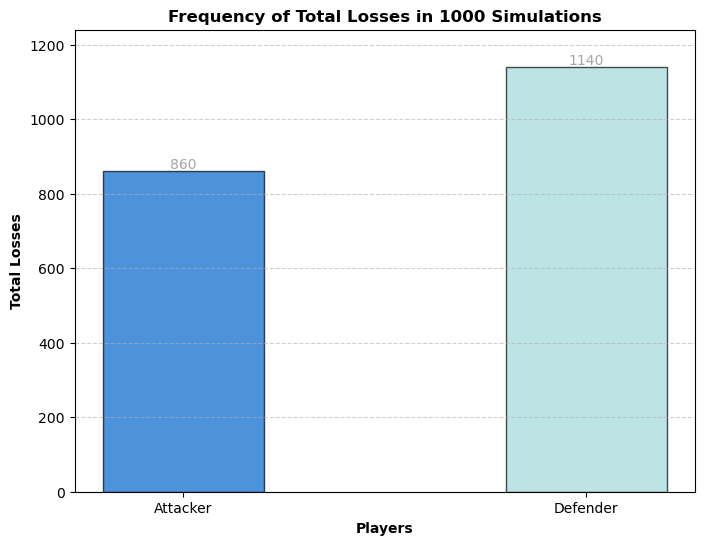

In [27]:
# Set up the figure
plt.figure(figsize=(8, 6))

# Different color for each bar
colors = ['#06C', '#A2D9D9']

labels = ['Attacker', 'Defender']
losses = [attackerTotalLosses, defenderTotalLosses]
bars = plt.bar(labels, losses, color=colors, alpha=0.7, edgecolor='black', width=0.4)
plt.ylabel('Total Losses', fontsize=10, fontweight='bold')
plt.xlabel('Players', fontsize=10, fontweight='bold')
plt.title('Frequency of Total Losses in 1000 Simulations', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Determine the maximum total losses for setting y-axis limit 
maxLosses = max(attackerTotalLosses, defenderTotalLosses)
plt.ylim(0, maxLosses + 100)

# Annotating bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height()}', ha='center', va='bottom', fontsize=10, color='gray', alpha=0.7)
    
plt.show()



### **Extra feature.**

The `simulateBattle` function simulates a battle between an attacker and defender based on their troops. It starts by defining lists for the losses of both sides and initializes the round counter. The `while` loop runs as long as the attacker and defender have troops left, simulating each battle round. The number of dice rolls for each side is determined by the `min(3, attackerTroops)` and `min(2, defenderTroops)` expressions, which limit the rolls based on the troops. Each roll's result is compared to determine losses for both sides. After each round, the losses are subtracted from the troops, and the results are appended to their respective loss lists. The loop continues until one side runs out of troops. At the end, the winner and the number of rounds are determined and printed. The function returns the lists of losses and the number of rounds.

This code uses `min` to limit the number of dice rolls based on remaining troops. The while loop ensures the battle continues until one side is defeated.

The commented-out code contains print statements that display the current round number, dice rolls for both sides, the results of each round, and the remaining troops for both the attacker and defender. It was created to check if the code worked as expected.

In [ ]:
def simulateBattle(attackerTroops, defenderTroops):
    ''' The function takes in the number of troops for the attacker and defender as arguments and simulates a battle between the two.'''
    attackerLosses = [attackerTroops]
    defenderLosses = [defenderTroops]
    roundNumber = 1

    # While loop checks if the attacker or defender has troops left.
    while attackerTroops > 0 and defenderTroops > 0:
        #print(f"Round {roundNumber}") # Used to print the round number.    # Commented out because was used to simulate the battles.
                
        attackerDice = rollDice(min(3, attackerTroops))
        defenderDice = rollDice(min(2, defenderTroops))
        
        #attackerDiceString = ' '.join(map(str, attackerDice))                              #
        #defenderDiceString = ' '.join(map(str, defenderDice))                              # Used to simulate the battles.
        #print(f'Attacker dice: {attackerDiceString}')  # Used to print the attacker dice.  #
        #print(f'Defender dice: {defenderDiceString}')  # Used to print the defender dice.  #
        
        attackerLoss = 0
        defenderLoss = 0
        
        for attackerDie, defenderDie in zip(attackerDice, defenderDice):
            if attackerDie > defenderDie:
                defenderLoss += 1
            else:
                attackerLoss += 1
        
        attackerTroops -= attackerLoss
        defenderTroops -= defenderLoss
        attackerLosses.append(attackerTroops)
        defenderLosses.append(defenderTroops)
        
        # Print the round results and remaining troops.                                            #
        #print(f"Round Results: Attacker Losses: {attackerLoss}, Defender Losses: {defenderLoss}") # Used to simulate the battles.
        #print(f"Remaining Troops: Attacker: {attackerTroops}, Defender: {defenderTroops}")        #

        roundNumber += 1
        
        # Determine the winner      
        if attackerTroops > 0:
            winner = "Attacker"
        else:
            winner = "Defender"
    
    # Print out the result
    print(f"Winner: {winner}")
    print(f"Total number of rounds: {roundNumber - 1}")
    return attackerLosses, defenderLosses, roundNumber - 1

   


Referral to a source of information:

[toppr website](https://www.toppr.com/guides/python-guide/references/methods-and-functions/methods/built-in/min/python-min/#:~:text=value%20of%20min()-,The%20min()%20function,-returns%20the%20smallest) provides useful information about using the `min()` function.

The loop `for` usage details were provided before (please check the provided link in the Creating function simulateBattleRounds section below the code).

#### Simulation based on AttackerTroops and DefenderTroops.

In [31]:
AttackerTroops = 20
DefenderTroops = 15
attackerLosses, defenderLosses, totalRounds = simulateBattle(AttackerTroops, DefenderTroops)


Winner: Defender
Total number of rounds: 18


#### Plotting the result.

Referral to a source of information:

[W3schools website](https://www.w3schools.com/python/ref_func_max.asp) explains the `max()` function usage.

[W3schools website](https://www.w3schools.com/python/ref_func_range.asp) teaches how to use the `range()`.

[Programiz website](https://www.programiz.com/python-programming/methods/built-in/list) provides information about using the `list()`.

[W3schools website](https://www.w3schools.com/python/matplotlib_plotting.asp) brings simple tutorial about using the `plt.plot()`.

[Real Python website](https://realpython.com/how-to-use-numpy-arange/) gives tutorial how to use `np.arrange()`.

[GeeksforGeeks website](https://www.geeksforgeeks.org/customizing-minor-ticks-in-matplotlib-turning-on-minor-ticks-only-on-the-y-axis/#:~:text=Appearance%20in%20Matplotlib-,2.%20Setting%20Minor%20Tick%20Locations,-You%20can%20use) shows how to set minor ticks.

[matplotlib official documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html#matplotlib-axes-axes-tick-params:~:text=matplotlib.a...-,matplotlib.axes.Axes.tick_params,-%23) helps with ticks customization.


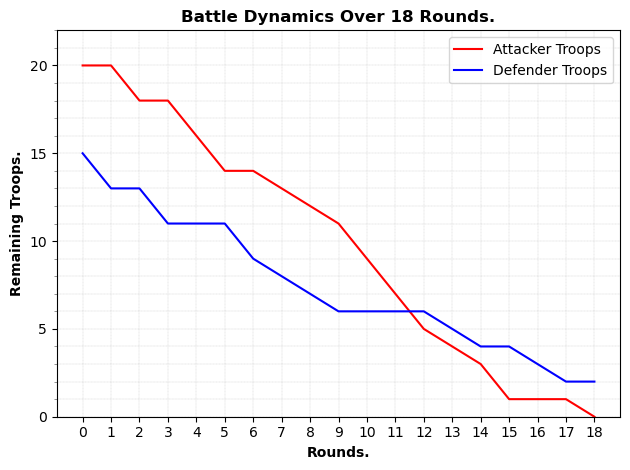

In [ ]:
# Find the maximum number of troops for setting the y-axis limit
max_troops = max(AttackerTroops, DefenderTroops)

# Create a list of round numbers (0 to totalRounds) for the x-axis of the plot
rounds = list(range(totalRounds + 1))

plt.plot(rounds, attackerLosses, label='Attacker Troops', color='red')
plt.plot(rounds, defenderLosses, label='Defender Troops', color='blue')
plt.xlabel('Rounds.', fontsize=10, fontweight='bold')
plt.ylabel('Remaining Troops.', fontsize=10, fontweight='bold')
plt.title(f'Battle Dynamics Over {totalRounds} Rounds.', fontsize=12, fontweight='bold')
# Add ticks for each battle round
plt.xticks(ticks=rounds)
# Ensure y-axis covers the entire range of troops
plt.ylim(0, max_troops * 1.1)
# Main y-ticks every 5 
plt.yticks(np.arange(0, max_troops + 1, 5))
# Add minor ticks without labels 
plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
# Set minor ticks length and color
plt.gca().tick_params(which='minor', length=2, color='gray')
plt.grid(which='both', linestyle='--', linewidth=0.2)
plt.tight_layout()
plt.legend()
plt.show()

***
### End